# Regresión usando scikit-learn
<br><br><br>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/245px-Scikit_learn_logo_small.svg.png">
<br><br><br>
Usaremos una base de datos de fútbol europeo, la cual tiene más de 25,000 partidos y más de 10,000 
jugadores para las temporadas de fútbol profesional europeo de 2008 a 2016.


In [1]:
# Importamos las librerías
import sqlite3
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns

#### Creamos una conexión a la base de datos y leemos la tabla "Player_Attributes"

In [8]:
Directorio = 'european_soccer/database.sqlite'
cnx = sqlite3.connect(Directorio) #Objeto de la conexión
dataframe = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [9]:
dataframe['overall_rating'].head()

0    67.0
1    67.0
2    62.0
3    61.0
4    61.0
Name: overall_rating, dtype: float64

In [10]:
dataframe.shape


(183978, 42)

In [11]:
dataframe.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [12]:
dataframe.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

#### De todas las columnas determinaremos cuáles usaremos como "features" para alimentar nuestro modelo

In [14]:
features = [
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

#### Seleccionamos el target

In [16]:
Target = ['overall_rating']

#### Limpiamos los datos eliminando filas con valores NAN

In [17]:
dataframe = dataframe.dropna()

#### Separamos las features en X y el target en Y

In [19]:
X = dataframe[features]
Y = dataframe[Target]
Y

,overall_rating
0,67.0
1,67.0
2,62.0
3,61.0
4,61.0
...,...
183973,83.0
183974,78.0
183975,77.0
183976,78.0


#### Miramos con lupa la información

In [21]:
X.iloc[3]

potential             65.0
crossing              48.0
finishing             43.0
heading_accuracy      70.0
short_passing         60.0
volleys               43.0
dribbling             50.0
curve                 44.0
free_kick_accuracy    38.0
long_passing          63.0
ball_control          48.0
acceleration          60.0
sprint_speed          64.0
agility               59.0
reactions             46.0
balance               65.0
shot_power            54.0
jumping               58.0
stamina               54.0
strength              76.0
long_shots            34.0
aggression            62.0
interceptions         40.0
positioning           44.0
vision                53.0
penalties             47.0
marking               62.0
standing_tackle       63.0
sliding_tackle        66.0
gk_diving              5.0
gk_handling           10.0
gk_kicking             9.0
gk_positioning         7.0
gk_reflexes            7.0
Name: 3, dtype: float64

In [22]:
X.head()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


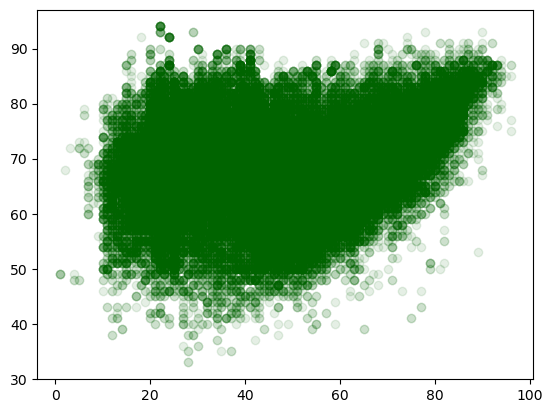

In [27]:
plt.scatter(X['interceptions'], Y, color ="darkgreen", label ="Data", alpha=.1)

<p style="font-family: Arial; font-size:1.75em; weight:bold; color:purple; font-style:bold">
    <br>
Separamos los datos en Training y Test Datasets
<br><br></p>

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=324)

In [29]:
scale = preprocessing.StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)

In [30]:
X_train.min()

np.float64(-5.375771500947367)

#### Creamos el modelo #"LinearRegresion" usando ScikitLearn

In [31]:
regressor = LinearRegression()

#### Ajustamos el modelo a los datos de entrenamiento

In [32]:
regressor.fit(X_train, Y_train)

LinearRegression()

#### Hagamos una predicción sobre el set de testeo

In [33]:
X_test = scale.transform(X_test)
y_prediction = regressor.predict(X_test)
y_result = y_prediction - Y_test
y_prediction.shape

(54107, 1)

In [34]:
y_prediction

array([[66.52174582],
       [79.78338402],
       [66.58730221],
       ...,
       [59.5728751 ],
       [62.18416052],
       [75.23062172]])

In [36]:
X_test = scale.transform(X_test)
y_prediction = regressor.predict(X_test)
y_result = y_prediction - Y_test
y_prediction.shape

C:\Users\di-su\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(54107, 1)

In [37]:
RMSE = sqrt(mean_squared_error(y_true = Y_test, y_pred = y_prediction))
regressor.score(X_test, Y_test)

-128.71517756429571

In [38]:
print(RMSE)

80.2040342063802
